# Q1

In [1]:
Alc_df = read.csv("/Users/gawain/Desktop/3.UBC/Block3/Data-543 - Data Collection/Assignments/A2/AlcData.csv")
head(Alc_df)

,A,AC,AR,P
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.01,0.32,0.52,0.37
2,0.07,0.40,0.68,0.50
3,-0.07,0.46,0.46,0.39
4,-0.08,0.18,0.52,0.34
5,-0.03,0.26,0.56,0.21
6,-0.01,0.33,0.67,0.71


### part a

What are the experimental units?

**Answer**

The experiment unit is the an experimental unit is a generic term that refers to a basic unit.

In this experiment, we are looking for the effect to the alcohol due to stimulants or incentives in 44 male college students.

Thus, there are 44 experimental units.


### part b

What is the response variable

**Answer**

The response variable is the output score in an experiment.

The score is the difference between the proportion correctly identified on one list of words and proportion incorrectly identified on a second list of words.

### part c

Which design appears to have been utilized out of these options:

- ‘Balanced completely randomized design’; 
- ‘Unbalanced completely randomized design’; 
- ‘Balanced randomized block design’; 
- ‘Unbalanced randomized block design’.

In [2]:
A <- Alc_df$A
AC <- Alc_df$AC
AR <- Alc_df$AR
P <- Alc_df$P
n.A <- length(A)
n.AC <- length(AC)
n.AR <- length(AR)
n.P <- length(P)
cat("Length for each columns: ",n.A," ",n.AC," ",n.AR," ", n.P)

Length for each columns:  11   11   11   11

**Answer**

We are looking for the effect of the stimulants or incentives to the alcohol, so we would like to make the difference between each response variable to the experiment unit(diff). 

Besides, the total length for each treatment is the same(length == 11), thus we will consider the design as **balanced completely randomized design**.


### part d

Are there any replicates? Explain

Pg 13

**Answer**

Yes, as all four treatments were applied to 11 students. Thus, there is replication.

### part e

Are there any duplicates? Explain.

**Answer**

We have 44 experimental units, and each unit have a treatment, thus we don't have the duplicates.



### part f

Carry out a formal test for difference in means among the treatments. 

Do so in R, but be sure to include all important information in your answer 

hypotheses, assumptions, summary output from R and note the p-value, decision and interpretation

In [3]:
# we should use ANOVA test for this question

# # the overall mean for gourp A, AC, AR, P
# miu.hat <- mean(c(A, AC, AR, P))
# cat("The estimated mean for overall samples:", round(miu.hat,3 ))

# group <- c('A', 'AC', 'AR', 'P')
# tau_diff <- c()
# for (i in 1:4){
#       data <- Alc_df[, i]
#       tau <- mean(data) - miu.hat
#       tau_diff[i] <- tau
#       cat("The estimated treatment effect for group", group[i] ,"design is:", round(tau, 3), "\n")
# }

# # To find confidence intervals we need to calculate the pooled variance.
# # 1. find sample variance with treatment A, AC, AR, P
# sample_var <- function(data){
#       var_s <- var(data)
#       return(var_s)
# }
# sample_variance <- c()
# for (i in 1:4){
#       v <- sample_var(Alc_df[, i])
#       sample_variance[i] <- v
#       cat("The estimated variance for group", group[i] ,"is:", v,'\n') 
# }

# # variance is list with 4 var fpr group A, AC, AR, P
# # n is a list with 4 length fpr group A, AC, AR, P
# sample_n <- c(n.A, n.AC, n.AR, n.P)
# pooled_variance <- function(variance, n){
#       result <- sum((n-1) * (variance)) / (sum(n) - length(n))
#       return(result)
# }

# s2.hat <- pooled_variance(sample_variance, sample_n)
# cat("The pooled variance is", s2.hat)


In [4]:
# 要用ANOVA 
# 1. To prepare our data for an ANOVA, we can use the stack() function. 
# This will stack our data on top of each other and create a column indicating the factor levels
stack_df <- stack(Alc_df, na.rm=TRUE)
colnames(stack_df) <- c('scores', 'design')
head(stack_df)

,scores,design
,<dbl>,<fct>
1,0.01,A
2,0.07,A
3,-0.07,A
4,-0.08,A
5,-0.03,A
6,-0.01,A


In [5]:
stack_df <- stack(Alc_df)
colnames(stack_df) <- c('scores', 'design')
aov_model <- aov(scores~design, data=stack_df)
summary(aov_model)

            Df Sum Sq Mean Sq F value   Pr(>F)    
design       3 0.9311  0.3104   11.67 1.25e-05 ***
Residuals   40 1.0640  0.0266                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

### part g

Use a contrast to test if alcohol leads to a reduction in the mean number of recalled words. 

Again, do so in R, but include all important pieces of information in your answer. 

Hint: there are three treatments that receive alcohol and one that does not

We may want to determine if the scores time from A, AC, AR is equal to the score from P. Or more specifically:

$$H_0: \theta = 0$$
$$H_A: \theta \neq 0$$

Where $$\theta = (\tau_A + \tau_{AC} + \tau_{AR})/3 - (\tau_P)$$

In [6]:
library(gmodels)
contrast <- fit.contrast(aov_model, 'design', c(1/3, 1/3, 1/3, -1))
contrast

                                                                        Estimate
design c=( 0.333333333333333 0.333333333333333 0.333333333333333 -1 ) -0.1248485
                                                                      Std. Error
design c=( 0.333333333333333 0.333333333333333 0.333333333333333 -1 ) 0.05678241
                                                                        t value
design c=( 0.333333333333333 0.333333333333333 0.333333333333333 -1 ) -2.198717
                                                                        Pr(>|t|)
design c=( 0.333333333333333 0.333333333333333 0.333333333333333 -1 ) 0.03374321
attr(,"class")
[1] "fit_contrast"

### part h

What assumptions were necessary for ‘accuracy’ in the above tests, and does it appear they reasonably hold? 

Provide some plots/measures/metrics/etc to support your answer here

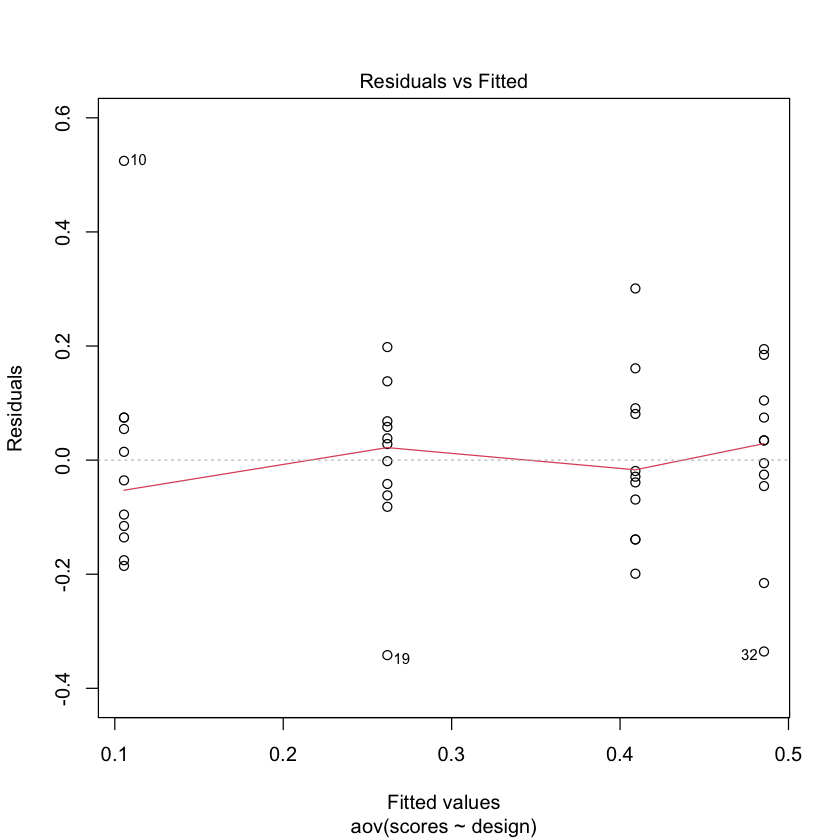

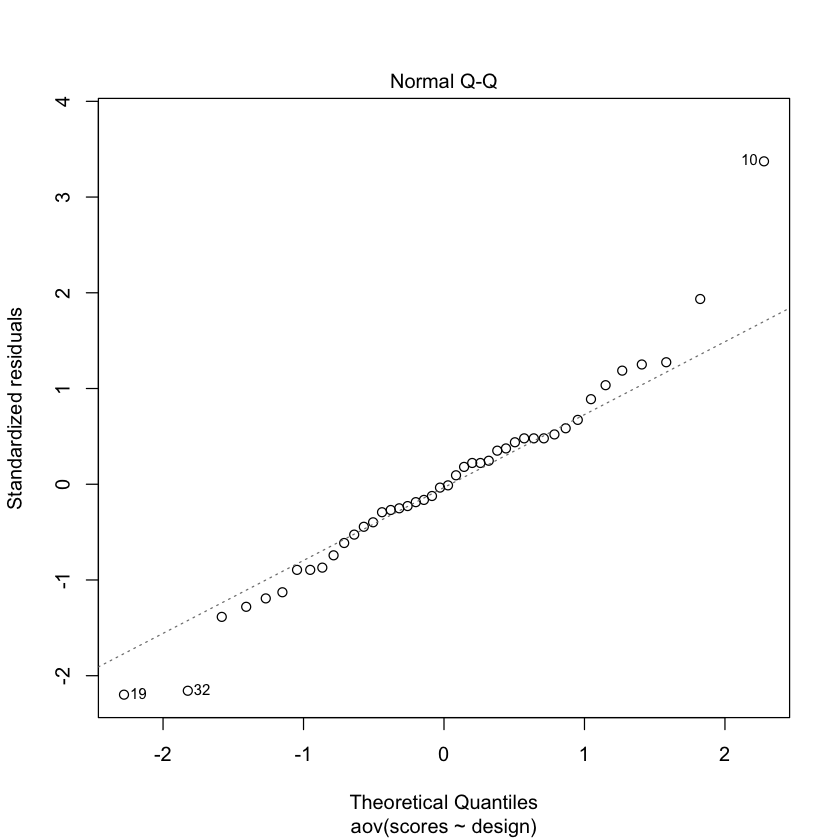

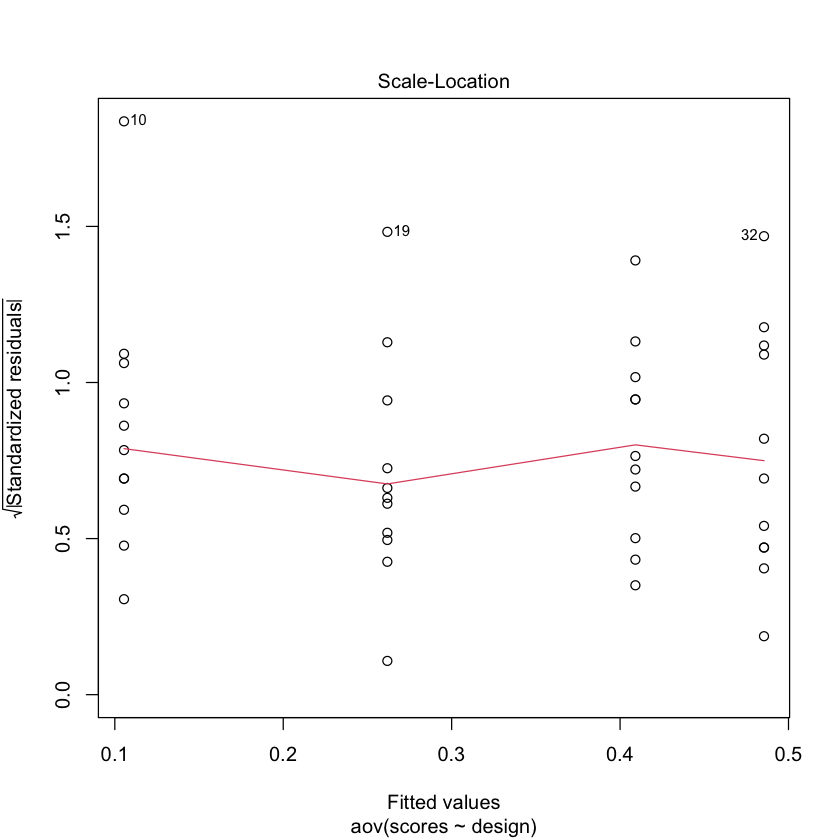

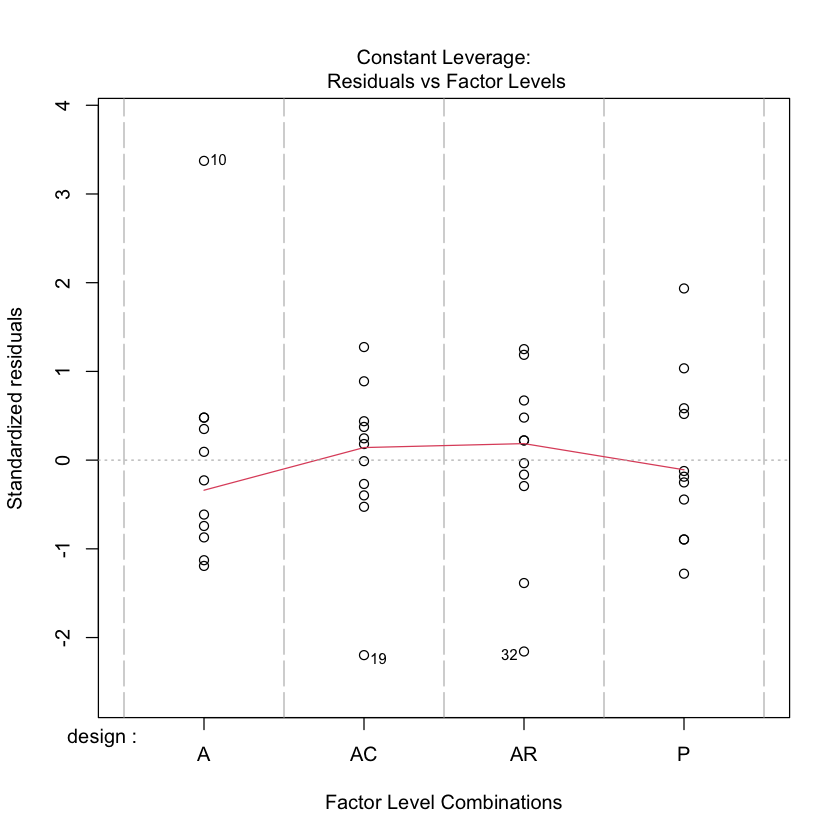

In [7]:
# pg 52
# constant variance of the experimental error, sigma^2, across all levels of the treatment factor, and
# 2. normality of the experimental errors.

plot(aov_model)
# Residual vs Fitted: red line close to the horizontal line when y=0, so we can say that the variance is constant  
# Normal Q-Q point on the line: normality meets

# Q2

A seed producer is considering three new varieties of tomatoes using genetic modification. 

They plan to field test these in the BC Interior using a commonly grown variety as a control. 

The trial will be for only one growing season. We will use yield, measured in kilograms per hectare, as the response variable. 

The producer has 30 farm partners throughout the Interior, all of whom have agreed to provide test plots of two hectare size.

### part a

How would you set up blocking for this experiment

**Answer**
Based on the above information, we will set the **Randomized Block Design** for this experiment 


### part b

Discuss why you would use the blocks described above.

**Answer**
      1.The trail will be for only one growing season
      2.3 treatments: three new varieties of tomatoes using genetic modification
      3.experiment unit: 30 test plots, each has 2 hectare size, provided by farm partners. Thus, 30*2=60 units
      4.response: yield
      5.response measurement: kg per hectare 
      6.blocks: 2 -> test plots of two hectare size

Suppose we have a dataset, it will looks like below:
A dataset with size of: 30*3


| block | type of tomatoes | yield |
|---|---|---|
|  1 |  A | 15 |
|  1 |  B | 16 |
|  1 |  C | 17 |
|  1 |  A | 12.5 |
|  1 |  B | 16.3 |
|  1 |  C | 17.8 |
|...|...|...|
|  2 |  A | 13.7 |
|  2 |  B | 16.9 |
|  2 |  C | 20.3 |
|  2 |  A | 13.5 |
|  2 |  B | 18.1 |
|  2 |  C | 20.9 |
|...|...|...|


Thus, it's apporiate to use the **Randomized Block Design**


### Q3

Consider the following ANOVA table for a randomized block design

|Source     | DF  | SS | MS   | F   | p-value|
|---        |---  |--- |---   |--- | --- |
Treatment   | 2   | 20 |10    | 5   | ?   |
Blocks      | 2   | 20 |10    |   -  |   -  |
Residual    | 4   |8   | 2    |   -  | -    |

### part a

Find the p-value for the F-test associated with the question mark in the above table.

In [8]:
ANOVA_find_Pvalue <- function(MS_treat, MS_Residual, df_treat, df_residual){
      Fbos <- MS_treat/MS_Residual
      result <- 1 - pf(Fbos, df_treat,df_residual)
      return(result)
}

In [9]:
result <- ANOVA_find_Pvalue(10, 2, 2, 4)
cat("The p-value for the F-test associated with the above table is: ", round(result, 5))

The p-value for the F-test associated with the above table is:  0.08163

### part b

Based on the above table, complete the following ANOVA table for a completely randomized design of the same data. 

(In other words, imagine we had not made use of the blocking variable)

lec 6 pg 41 & 27

Based on the information we have from question and part a, the CRD ANOVA table we have is:

|Source     | DF  | SS | MS   | F   | p-value   |
|---        |---  |--- |---   |---  | ---       |
|Treatment  | 2   | 20 |10    | 5   | 0.08163   |
|Blocks     | 2   | 20 |10    |   - |   -       |
|Residual   | 4   |8   | 2    |   - | -         |
|Total      |8    | 48 |    | -     | -         |

In [13]:
SS.treat <- 20
SS.total <- 48
SS.block <- 20
SS.residual <- SS.total - SS.treat

DF.treat <- 2
DF.total <- 8
DF.block <- 2
DF.residual <- DF.total - DF.treat

MS.treat <- SS.treat / DF.treat
MS.residual <- SS.residual/ DF.residual

In [14]:
CRD_ANOVA_Table <- function(SS.treat, SS.total, DF.treat, DF.total, MS.treat){

      SS.C.total <- SS.total
      DF.C.total <- DF.total

      SS.C.treat <- SS.treat
      DF.C.treat <- DF.treat
      MS.C.treat <- MS.treat

      SS.C.residual <- SS.C.total - SS.C.treat
      DF.C.residual <- DF.C.total - DF.C.treat
      MS.C.residual <- SS.C.residual / DF.C.residual

      Fobs.C.treat <- MS.C.treat / MS.C.residual

      C.p_value <- ANOVA_find_Pvalue(MS.C.treat, MS.C.residual, DF.C.treat, DF.C.residual)
      
      CRD_df <- data.frame(
      Source = c('Treatment', 'Residual', 'Total'),
      SS = c(SS.C.treat,  SS.C.residual, SS.C.total),
      DF = c(DF.C.treat,  DF.C.residual, DF.C.total),
      Mean_Square = c(round(MS.C.treat,3),  round(MS.C.residual,3), NA),
      Fobs = c(round(Fobs.C.treat,3), NA, NA),
      p_value = c(round(C.p_value,3), NA, NA)
      )

      column_name <- c('Source', 'SS', 'DF', 'Mean Square', 'Fobs', 'p-value')
      colnames(CRD_df) <- column_name
      return(CRD_df)
}


CRD_df <- CRD_ANOVA_Table(SS.treat, SS.total, DF.treat, DF.total, MS.treat)
CRD_df

Source,SS,DF,Mean Square,Fobs,p-value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Treatment,20,2,10.000,2.143,0.198
Residual,28,6,4.667,NA,NA
Total,48,8,NA,NA,NA


### part c

Suppose all the required assumptions held for both the above tests, and that you (as the researcher) actually cared about whatever this ‘treatment’ is. 

Comment on the ramifications of the results from (a) and (b).